In [2]:
!nvidia-smi

Sun Sep 29 13:59:29 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.107.02             Driver Version: 550.107.02     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   59C    P8              2W /   80W |      55MiB /   8192MiB |     11%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Make sure cuda is available
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
0
1
NVIDIA GeForce RTX 2070 with Max-Q Design


In [3]:
import nibabel as nib
import matplotlib.pyplot as plt

In [4]:
def show_slices_MRI(nii_file):
    img = nib.load(nii_file)

    # Obtain image data as a 3D numpy array
    data = img.get_fdata()

    # Print the dimensions of the 3D image data
    print("Dimensiones de la imagen 3D:", data.shape)

    # Show the three projections of the 3D image
    # Axial projection (top view)
    axial_slice = data[:, :, data.shape[2] // 2]  # Take a slice in the middle
    print("Dimensiones de la proyección axial:", axial_slice.shape)

    # Sagittal projection (lateral view)
    sagittal_slice = data[data.shape[0] // 2, :, :]  # Take a slice in the middle
    print("Dimensiones de la proyección sagital:", sagittal_slice.shape)

    # Coronal projection (frontal view)
    coronal_slice = data[:, data.shape[1] // 2, :]  # Take a slice in the middle
    print("Dimensiones de la proyección coronal:", coronal_slice.shape)

    # Plot the three projections
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Show the axial projection
    axes[0].imshow(axial_slice.T, cmap="gray", origin="lower")
    axes[0].set_title('Axial (Vista superior)')

    # Show the sagittal projection
    axes[1].imshow(sagittal_slice.T, cmap="gray", origin="lower")
    axes[1].set_title('Sagital (Vista lateral)')

    # Show the coronal projection
    axes[2].imshow(coronal_slice.T, cmap="gray", origin="lower")
    axes[2].set_title('Coronal (Vista frontal)')

    plt.show()


Dimensiones de la imagen 3D: (182, 218, 182)
Dimensiones de la proyección axial: (182, 218)
Dimensiones de la proyección sagital: (218, 182)
Dimensiones de la proyección coronal: (182, 182)


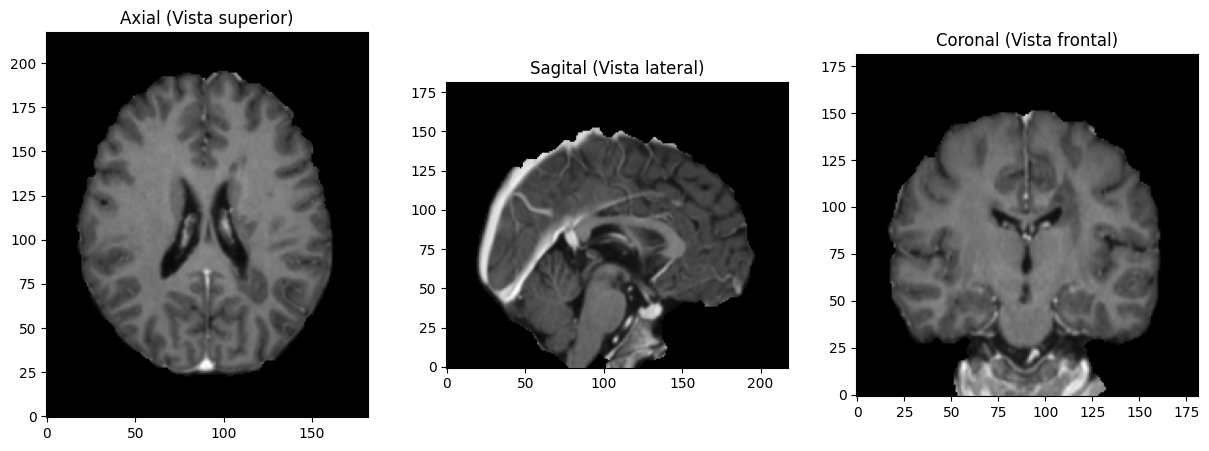

In [6]:
# Read the path to the MRI file
with open("path.txt", "r") as f:
    path = f.read().strip()

show_slices_MRI(path)

In [7]:
from ultralytics import YOLO
import os

In [63]:
def try_YOLOv8(image_name: str) -> str:
    # Load the YOLOv5 model
    model = YOLO(model="yolov8n.pt", task="detect", verbose=False)

    # Load an image
    img = os.path.join(os.getcwd(), '..', 'images', image_name)

    # Perform inference
    results = model(img, save = True, project=os.path.join(os.getcwd(), '..', 'images'), verbose=False)
    
    # Return the path to the saved image
    return results[0].save_dir

Results saved to /home/rorro6787/Escritorio/Universidad/4Carrera/TFG/MRI-Neurodegenerative-Disease-Detection/src/../images/predict7


Text(0.5, 1.0, 'YOLO detection image')

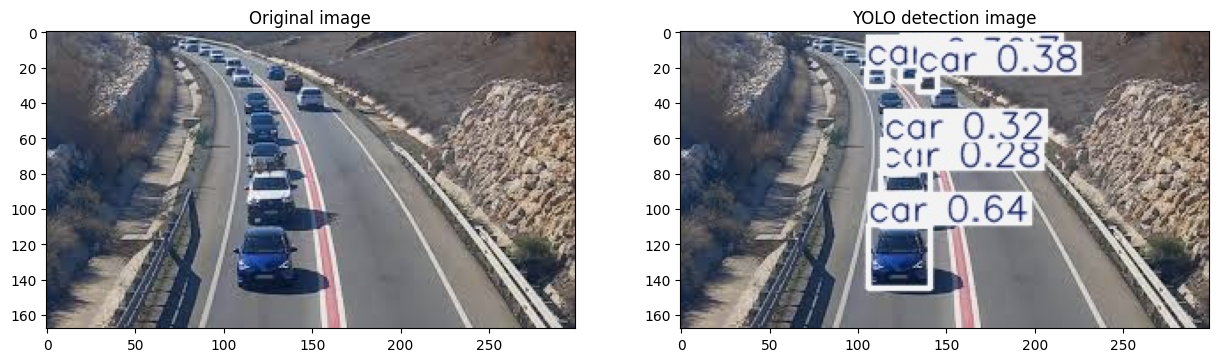

In [64]:
image_name = "download.jpeg"
original_image = os.path.join(os.getcwd(), '..', 'images', image_name)
YOLO_image_path = os.path.join(try_YOLOv8(image_name), image_name)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(plt.imread(original_image))
axes[0].set_title('Original image')

axes[1].imshow(plt.imread(YOLO_image_path))
axes[1].set_title('YOLO detection image')